In [45]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class KNN():
    """
    K-nearest neighbors (KNN) model
    """

    def __init__(self, X, y, k, p=2, uniform=False):
        """
        Initialize KNN model
        
        Parameters:   
        X : numpy array of shape (n_samples, n_features)
        y : numpy array of shape (n_samples,)
        k : number of nearest neighbors to consider when predicting
        p : Minkowski distance power (default=2)
        uniform : weighing method (default=False)
        """
        self.X = X
        self.y = y
        self.k = k
        self.p = p
        self.uniform = uniform
        
    def distance_calculate(self, indx, point):
        """
        Calculate the distance between the given point and the point at the given index in the X dataset
        
        Parameters:
        indx : index of the point in the X dataset
        point : numpy array of shape (n_features,)
        
        Returns:
        distance between the given point and the point at the given index in the X dataset
        """
        return np.sum((self.X[indx] - point) ** self.p) ** (1 / self.p)
    
    def find_k_nearest(self, distances):
        """
        Find the k nearest neighbors to the given point
        
        Parameters:
        distances : numpy array of shape (n_samples,)
        
        Returns:
        indices of the k nearest neighbors in the X dataset
        """
        return np.argsort(distances)[:self.k]
    
    def label_prediction(self, top_k, distances):
        """
        Predict the class label for the given point
        
        Parameters: 
        top_k : indices of the k nearest neighbors in the X dataset
        distances : numpy array of shape (n_samples,)
        
        Returns:
        predicted class label for the given point
        """
        y_true_k = self.y[top_k]
        votes = [0] * len(np.unique(self.y))

        if self.uniform:
            for point in y_true_k:
                votes[point] += 1
        else:
            for indx, point in enumerate(y_true_k):
                if distances[top_k[indx]] != 0:
                    votes[point] += (1 / distances[top_k[indx]])

        return np.argmax(votes)
    
    def predict(self, X_test):
        pred = []
        for point in X_test:
            pred.append(self.knn(point))
        return pred

    def knn(self, point):
        """
        Perform KNN prediction for the given point
        
        Parameters: 
        point : numpy array of shape (n_features,)
        """
        distances = [self.distance_calculate(indx, point) for indx in range(len(self.X))]
        top_k = self.find_k_nearest(distances)
        return self.label_prediction(top_k, distances)


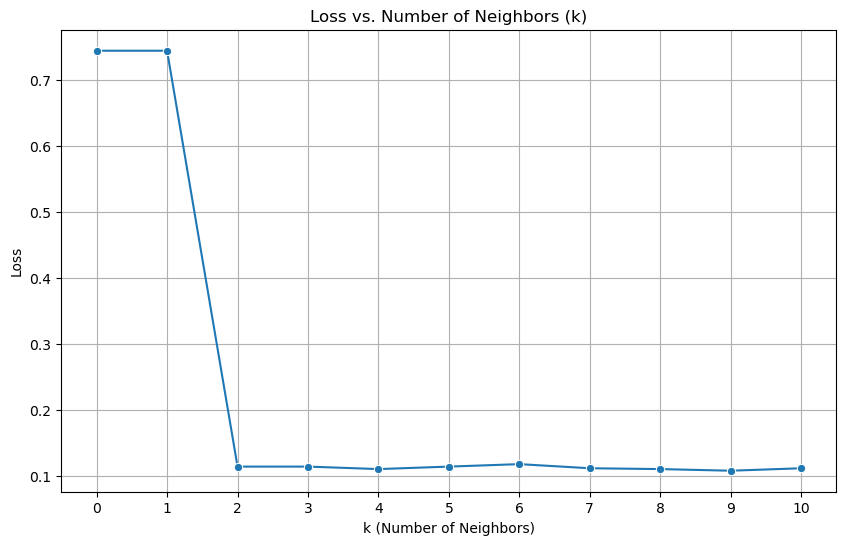

Accuracy score for train data 0.88625
Accuracy score for test data 0.9


In [46]:
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_repeated=0, n_classes=4, n_clusters_per_class=1, random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)


import matplotlib.pyplot as plt
train_loss = []
k_values = range(0, 11)  # k values from 2 to 10

for k in k_values:
    knn = KNN(X_train,y_train,k,p=2,uniform=False)
    ytrain_pred = knn.predict(X_train)
    accuracy = accuracy_score(y_train, ytrain_pred)
    train_loss.append(1-accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=train_loss, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Neighbors (k)')
plt.xticks(k_values)  # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()


knn=KNN(X_train,y_train,2,p=2,uniform=False)
ytrain_pred=knn.predict(X_train)
ytest_pred=knn.predict(X_test)
print("Accuracy score for train data",accuracy_score(y_train,ytrain_pred))
print("Accuracy score for test data",accuracy_score(y_test,ytest_pred))



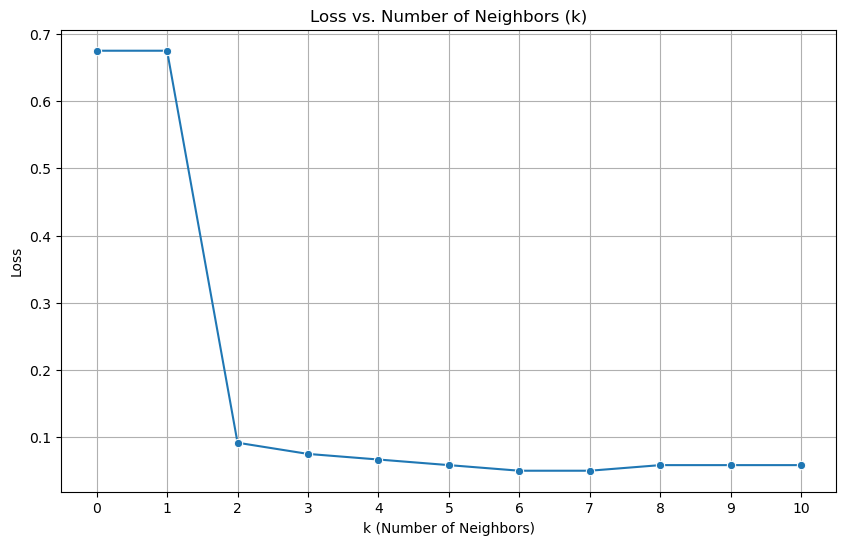

Accuracy score for train data 0.9083333333333333
Accuracy score for test data 1.0


In [47]:
# data

data=load_iris()
X=data['data']
y=data['target']
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)




import matplotlib.pyplot as plt
train_loss = []
k_values = range(0, 11)  # k values from 2 to 10

for k in k_values:
    knn = KNN(X_train_sc,y_train,k,p=2,uniform=False)
    ytrain_pred = knn.predict(X_train_sc)
    accuracy = accuracy_score(y_train, ytrain_pred)
    train_loss.append(1-accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=train_loss, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Neighbors (k)')
plt.xticks(k_values)  # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()


knn=KNN(X_train_sc,y_train,2,p=2,uniform=False)
ytrain_pred=knn.predict(X_train_sc)
ytest_pred=knn.predict(X_test_sc)
print("Accuracy score for train data",accuracy_score(y_train,ytrain_pred))
print("Accuracy score for test data",accuracy_score(y_test,ytest_pred))



In [38]:
df = pd.DataFrame(X_test, columns=data['feature_names'])
df['target'] = y_test
import plotly.express as px
feature_names = data['feature_names']
fig = px.scatter_3d(
    df, 
    x=feature_names[0], 
    y=feature_names[1], 
    z=feature_names[2], 
    color=df[feature_names[3]], 
    symbol=df['target'].astype(str),
    labels={'symbol': 'Species'},
    title="Plot of Iris Test Dataset"
)

fig.show()

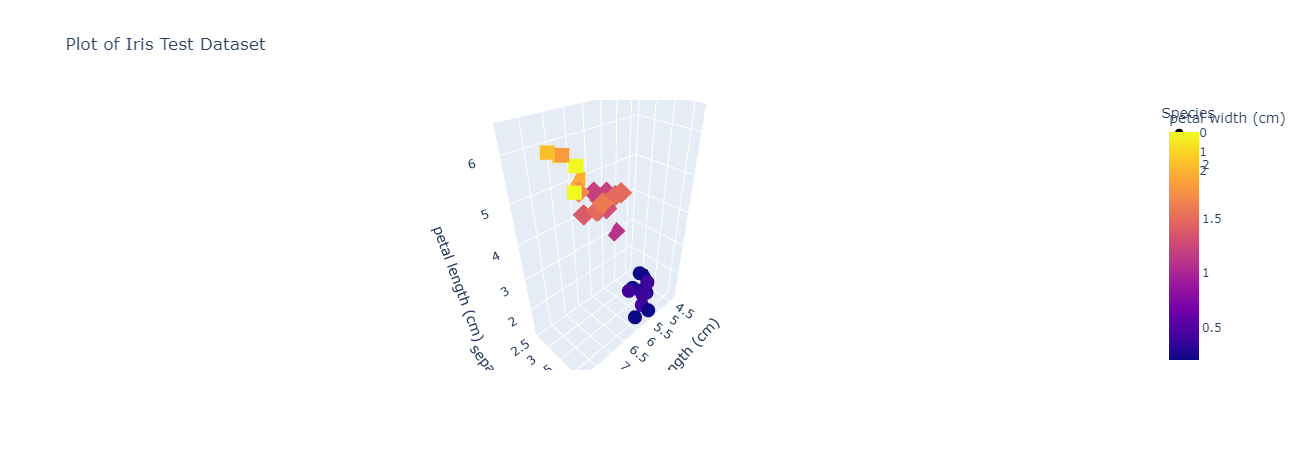

In [44]:
#from IPython.display import Image, display
#image_path = "knn_test_data.png"
#display(Image(filename=image_path))

In [42]:
df = pd.DataFrame(X_test, columns=data['feature_names'])
df['target'] = ytest_pred

feature_names = data['feature_names']
fig = px.scatter_3d(
    df, 
    x=feature_names[0], 
    y=feature_names[1], 
    z=feature_names[2], 
    color=df[feature_names[3]], 
    symbol=df['target'].astype(str),
    labels={'symbol': 'Species'},
    title="Plot of Predicted Test Iris Dataset"
)

fig.show()

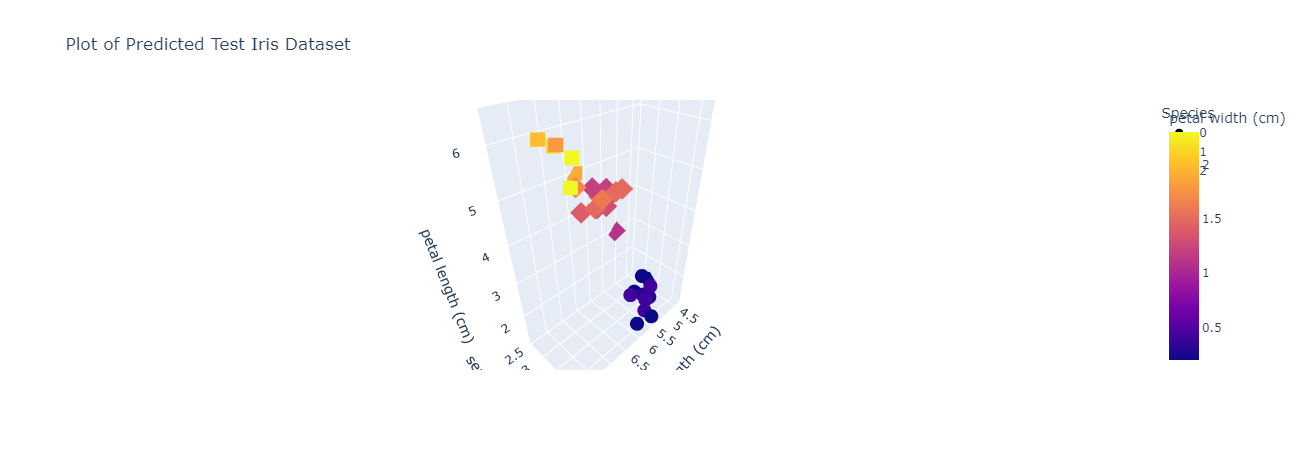

In [41]:

#image_path = "newplot.png"
#display(Image(filename=image_path))